本实例为巴尔的摩公务员工资数据集分析

In [1]:
import numpy as np 
import pandas as pd 
from pandas import DataFrame,Series
import seaborn as sns 
%matplotlib inline

In [2]:
salary=pd.read_csv('Baltimore_City_Employee_Salaries_FY2016.csv')

In [3]:
salary.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev (031),10/24/1979 12:00:00 AM,$56705.00,$54135.44
1,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29045,States Attorneys Office (045),09/25/2006 12:00:00 AM,$75500.00,$72445.87
2,"Abbey,Emmanuel",CONTRACT SERV SPEC II,A40001,M-R Info Technology (001),05/01/2013 12:00:00 AM,$60060.00,$59602.58
3,"Abbott-Cole,Michelle",Operations Officer III,A90005,TRANS-Traffic (005),11/28/2014 12:00:00 AM,$70000.00,$59517.21
4,"Abdal-Rahim,Naim A",EMT Firefighter Suppression,A64120,Fire Department (120),03/30/2011 12:00:00 AM,$64365.00,$74770.82


In [4]:
salary.shape

(13818, 7)

In [5]:
salary.isnull().sum()

Name              0
JobTitle          0
AgencyID          0
Agency            0
HireDate          0
AnnualSalary      0
GrossPay        272
dtype: int64

In [6]:
salary=salary.dropna()

In [7]:
salary.isnull().sum()

Name            0
JobTitle        0
AgencyID        0
Agency          0
HireDate        0
AnnualSalary    0
GrossPay        0
dtype: int64

In [8]:
salary.shape

(13546, 7)

In [9]:
salary['AnnualSalary']=salary['AnnualSalary'].str.strip('$')
salary['GrossPay']=salary['GrossPay'].str.strip('$')
salary.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev (031),10/24/1979 12:00:00 AM,56705.00,54135.44
1,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29045,States Attorneys Office (045),09/25/2006 12:00:00 AM,75500.00,72445.87
2,"Abbey,Emmanuel",CONTRACT SERV SPEC II,A40001,M-R Info Technology (001),05/01/2013 12:00:00 AM,60060.00,59602.58
3,"Abbott-Cole,Michelle",Operations Officer III,A90005,TRANS-Traffic (005),11/28/2014 12:00:00 AM,70000.00,59517.21
4,"Abdal-Rahim,Naim A",EMT Firefighter Suppression,A64120,Fire Department (120),03/30/2011 12:00:00 AM,64365.00,74770.82


In [10]:
salary['GrossPay'].dtype

dtype('O')

In [11]:
salary['GrossPay']=salary['GrossPay'].astype(float)
salary['AnnualSalary']=salary['AnnualSalary'].astype(float)
salary['GrossPay'].dtype

dtype('float64')

In [12]:
salary['month']=salary['HireDate'].str.split('/').str[0]
salary[['HireDate','month']].head()

,HireDate,month
0,10/24/1979 12:00:00 AM,10
1,09/25/2006 12:00:00 AM,09
2,05/01/2013 12:00:00 AM,05
3,11/28/2014 12:00:00 AM,11
4,03/30/2011 12:00:00 AM,03


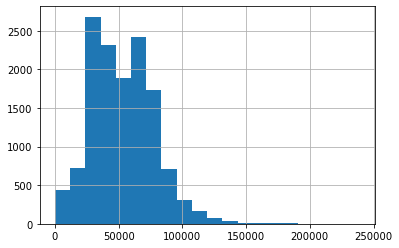

In [14]:
salary['AnnualSalary'].hist(bins=20)

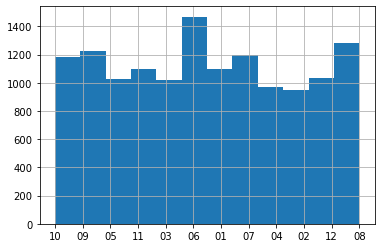

In [17]:
salary['month'].hist(bins=12)

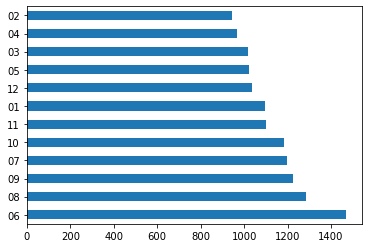

In [19]:
month_count=salary['month'].value_counts()
month_count.plot(kind='barh')